In [1]:
pip install plotly dash pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import matplotlib.pyplot as plt


In [3]:
# Read OnlineRetail1.csv 
OnlineRetail1_df = pd.read_csv('OnlineRetail1.csv')
OnlineRetail1_df.head()





,InvoiceID,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
OnlineRetail1_df.shape


(1039, 8)

In [5]:
print (OnlineRetail1_df.isnull().sum()) 


InvoiceID      0
StockCode      0
Description    1
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     1
Country        0
dtype: int64


In [6]:
OnlineRetail1_df = OnlineRetail1_df.dropna()


In [7]:
print (OnlineRetail1_df.isnull().sum()) 


InvoiceID      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [8]:
duplicate_rows=OnlineRetail1_df.duplicated()
OnlineRetail1_df.duplicated().sum() 


np.int64(23)

In [9]:
OnlineRetail1_df =OnlineRetail1_df.drop_duplicates()


In [10]:
duplicate_rows=OnlineRetail1_df.duplicated()
OnlineRetail1_df.duplicated().sum() 


np.int64(0)

In [11]:
OnlineRetail1_df.columns


Index(['InvoiceID', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [12]:
print(OnlineRetail1_df.dtypes)


InvoiceID       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [13]:
# Remove 'StockCode' and 'CustomerID' columns
OnlineRetail2_df = OnlineRetail1_df.drop(columns=['StockCode', 'CustomerID'])

# Verification
print(OnlineRetail2_df.columns)

Index(['InvoiceID', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'Country'],
      dtype='object')


In [14]:
# Convert 'InvoiceID' to categorical codes (numerical)
OnlineRetail2_df['InvoiceID'] = OnlineRetail2_df['InvoiceID'].astype('category').cat.codes

# Verify the conversion
print(OnlineRetail2_df['InvoiceID'].dtype)

int8


In [15]:
# Convert 'InvoiceDate' to datetime format

OnlineRetail2_df['InvoiceDate'] = pd.to_datetime(OnlineRetail2_df['InvoiceDate'], format='%d/%m/%Y', errors='coerce')

# Verify the conversion
print(OnlineRetail2_df['InvoiceDate'].dtype)




datetime64[ns]


In [16]:
print(OnlineRetail2_df.dtypes)


InvoiceID                int8
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
Country                object
dtype: object


In [17]:
# Read StoreSales.csv

StoreSales_df = pd.read_csv('StoreSales.csv')
StoreSales_df.head()


,InvoiceID,Country,Description,UnitPrice,Quantity,Tax 5%,InvoiceDate,Payment
0,750-67-8428,Yangon,Health and beauty,74.69,7,26.1415,1/05/2019,Ewallet
1,226-31-3081,Naypyitaw,Electronic accessories,15.28,5,3.8200,3/08/2019,Cash
2,631-41-3108,Yangon,Home and lifestyle,46.33,7,16.2155,3/03/2019,Credit card
3,123-19-1176,Yangon,Health and beauty,58.22,8,23.2880,1/27/2019,Ewallet
4,373-73-7910,Yangon,Sports and travel,86.31,7,30.2085,2/08/2019,Ewallet


In [18]:
StoreSales_df.shape


(1000, 8)

In [19]:
StoreSales_df.columns


Index(['InvoiceID', 'Country', 'Description', 'UnitPrice', 'Quantity',
       'Tax 5%', 'InvoiceDate', 'Payment'],
      dtype='object')

In [20]:
print (StoreSales_df.isnull().sum()) 


InvoiceID      0
Country        0
Description    0
UnitPrice      0
Quantity       0
Tax 5%         0
InvoiceDate    0
Payment        0
dtype: int64


In [21]:
duplicate_rows=StoreSales_df.duplicated()
StoreSales_df.duplicated().sum()


np.int64(0)

In [22]:
StoreSales_df.dtypes


InvoiceID       object
Country         object
Description     object
UnitPrice      float64
Quantity         int64
Tax 5%         float64
InvoiceDate     object
Payment         object
dtype: object

In [23]:
# Remove 'Tax 5%', and 'Payment' columns
StoreSales2_df = StoreSales_df.drop(columns=['Tax 5%', 'Payment'])

# Verification
print(StoreSales2_df.columns)


Index(['InvoiceID', 'Country', 'Description', 'UnitPrice', 'Quantity',
       'InvoiceDate'],
      dtype='object')


In [24]:
# Convert 'InvoiceID' to categorical codes (numerical)
StoreSales2_df['InvoiceID'] = StoreSales2_df['InvoiceID'].astype('category').cat.codes

# Verify the conversion
print(StoreSales2_df['InvoiceID'].dtype)

int16


In [25]:
## Convert 'InvoiceDate' to datetime format
StoreSales2_df['InvoiceDate'] = pd.to_datetime(StoreSales2_df['InvoiceDate'], format='%d/%m/%Y', errors='coerce')

# Verify the conversion
print(StoreSales2_df['InvoiceDate'].dtype)


datetime64[ns]


In [26]:
print(StoreSales2_df.dtypes)


InvoiceID               int16
Country                object
Description            object
UnitPrice             float64
Quantity                int64
InvoiceDate    datetime64[ns]
dtype: object


In [27]:
StoreSales2_df = StoreSales2_df.rename_axis(index={'InvoiceID': 'InvoiceID'})
StoreSales2_df = StoreSales2_df.rename_axis(index={'Country': 'Country'})
StoreSales2_df = StoreSales2_df.rename_axis(index={'Description': 'Description'})
StoreSales2_df = StoreSales2_df.rename_axis(index={'UnitPrice': 'UnitPrice'})
StoreSales2_df = StoreSales2_df.rename_axis(index={'Quantity': 'Quantity'})
StoreSales2_df = StoreSales2_df.rename_axis(index={'Quantity': 'Quantity'})
StoreSales2_df = StoreSales2_df.rename_axis(index={'InvoiceDate': 'InvoiceDate'})

In [28]:
# Print the original columns
print("Original columns:")
print(StoreSales2_df.columns)




Original columns:
Index(['InvoiceID', 'Country', 'Description', 'UnitPrice', 'Quantity',
       'InvoiceDate'],
      dtype='object')


In [29]:
# Define the new order of columns
new_order = ['InvoiceID', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'Country']

# Reorder columns
StoreSales2_df = StoreSales2_df[new_order]

# Print the reordered columns
print("\nReordered columns:")
print(StoreSales2_df.columns)





Reordered columns:
Index(['InvoiceID', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'Country'],
      dtype='object')


In [30]:
OnlineRetail2_df.columns


Index(['InvoiceID', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'Country'],
      dtype='object')

In [31]:
print(StoreSales2_df.dtypes)
print(OnlineRetail2_df.dtypes)



InvoiceID               int16
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
Country                object
dtype: object
InvoiceID                int8
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
Country                object
dtype: object


In [32]:
StoreSales2_df['InvoiceID'] = StoreSales2_df['InvoiceID'].astype('int64')
OnlineRetail2_df['InvoiceID'] = OnlineRetail2_df['InvoiceID'].astype('int64')

print(StoreSales2_df.dtypes)
print(OnlineRetail2_df.dtypes)



InvoiceID               int64
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
Country                object
dtype: object
InvoiceID               int64
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
Country                object
dtype: object


In [33]:
OnlineRetail2_df.columns



Index(['InvoiceID', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'Country'],
      dtype='object')

In [34]:
StoreSales2_df.columns



Index(['InvoiceID', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'Country'],
      dtype='object')

In [35]:
StoreSales2_df.shape


(1000, 6)

In [36]:
OnlineRetail2_df.shape

(1015, 6)

In [37]:
# Remove the last 15 rows
OnlineRetail2_df = OnlineRetail2_df[:-15]
OnlineRetail2_df.shape

(1000, 6)

In [38]:
common_columns = ['InvoiceID', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'Country']
OnlineRetail2_df = OnlineRetail2_df[common_columns]
StoreSales2_df = StoreSales2_df [common_columns]


In [39]:
StoreSales2_df.head()


,InvoiceID,Description,Quantity,InvoiceDate,UnitPrice,Country
0,814,Health and beauty,7,2019-05-01,74.69,Yangon
1,142,Electronic accessories,5,2019-08-03,15.28,Naypyitaw
2,653,Home and lifestyle,7,2019-03-03,46.33,Yangon
3,18,Health and beauty,8,NaT,58.22,Yangon
4,339,Sports and travel,7,2019-08-02,86.31,Yangon


In [40]:
OnlineRetail2_df.head()


,InvoiceID,Description,Quantity,InvoiceDate,UnitPrice,Country
0,0,WHITE HANGING HEART T-LIGHT HOLDER,6,NaT,2.55,United Kingdom
1,0,WHITE METAL LANTERN,6,NaT,3.39,United Kingdom
2,0,CREAM CUPID HEARTS COAT HANGER,8,NaT,2.75,United Kingdom
3,0,KNITTED UNION FLAG HOT WATER BOTTLE,6,NaT,3.39,United Kingdom
4,0,RED WOOLLY HOTTIE WHITE HEART.,6,NaT,3.39,United Kingdom


In [41]:
print (OnlineRetail2_df.isnull().sum()) 


InvoiceID         0
Description       0
Quantity          0
InvoiceDate    1000
UnitPrice         0
Country           0
dtype: int64


In [42]:
# Remove InvoiceDate
OnlineRetail2_df = OnlineRetail2_df.drop(columns=['InvoiceDate'])

# Verification
print(OnlineRetail2_df.columns)


Index(['InvoiceID', 'Description', 'Quantity', 'UnitPrice', 'Country'], dtype='object')


In [43]:
print (StoreSales2_df.isnull().sum()) 


InvoiceID        0
Description      0
Quantity         0
InvoiceDate    587
UnitPrice        0
Country          0
dtype: int64


In [44]:
# Remove InvoiceDate
StoreSales2_df = StoreSales2_df.drop(columns=['InvoiceDate'])

# Verification
print(StoreSales2_df.columns)



Index(['InvoiceID', 'Description', 'Quantity', 'UnitPrice', 'Country'], dtype='object')


In [45]:
StoreSales2_df.to_csv('StoreSales2_df.csv', index=False)


In [46]:
OnlineRetail2_df.to_csv('OnlineRetail2_df.csv', index=False)


In [47]:
# Concatenate DataFrames to stack rows
unified_df = pd.concat([StoreSales2_df, OnlineRetail2_df], ignore_index=True)

print(unified_df)


      InvoiceID                         Description  Quantity  UnitPrice  \
0           814                   Health and beauty         7      74.69   
1           142              Electronic accessories         5      15.28   
2           653                  Home and lifestyle         7      46.33   
3            18                   Health and beauty         8      58.22   
4           339                   Sports and travel         7      86.31   
...         ...                                 ...       ...        ...   
1995         62                    BLUE PARTY BAGS          1       2.10   
1996         62   FELTCRAFT PRINCESS CHARLOTTE DOLL         1       3.75   
1997         62  PINK CREAM FELT CRAFT TRINKET BOX          1       1.25   
1998         62         FELTCRAFT CUSHION BUTTERFLY         1       3.75   
1999         62     RED RETROSPOT OVEN GLOVE DOUBLE         1       2.95   

             Country  
0             Yangon  
1          Naypyitaw  
2             Yang

In [48]:
unified_df.to_csv('unified.csv', index=False)


In [49]:
unified_df.columns


Index(['InvoiceID', 'Description', 'Quantity', 'UnitPrice', 'Country'], dtype='object')

In [50]:
pip install pandas numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
print("\nBasic statistics for each numeric column:")
print(unified_df.describe())




Basic statistics for each numeric column:
         InvoiceID     Quantity    UnitPrice
count  2000.000000  2000.000000  2000.000000
mean    268.432000     9.122500    29.352325
std     308.603517    27.464553    32.577498
min       0.000000   -24.000000     0.100000
25%      40.000000     2.000000     2.062500
50%      60.000000     5.000000    11.670000
75%     499.250000     9.000000    55.405000
max     999.000000   600.000000   165.000000


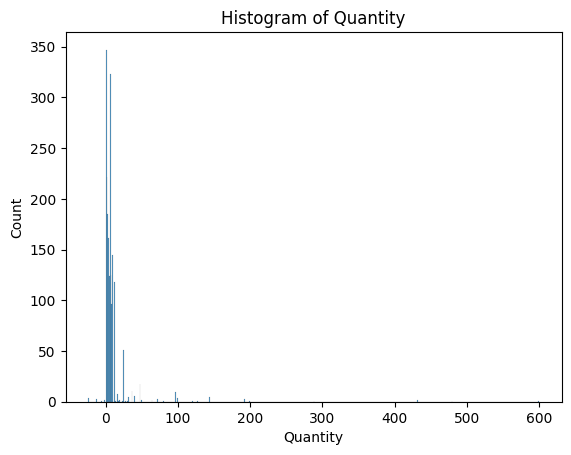

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram of a specific column
sns.histplot(unified_df['Quantity'])
plt.title('Histogram of Quantity')
plt.show()

In [56]:
# Calculate SalesTotal
unified_df['SalesTotal'] = unified_df['Quantity'] * unified_df['UnitPrice']

# Total sales across all transactions
total_sales =unified_df['SalesTotal'].sum()
print("\nTotal Sales Across All Transactions: ${:.2f}".format(total_sales))


Total Sales Across All Transactions: $332066.45


In [57]:
# Sales by Product Category
sales_by_category = unified_df.groupby('Description')['SalesTotal'].sum().sort_values(ascending=False)
print("\nSales by Product Category:")
print(sales_by_category)


Sales by Product Category:
Description
Food and beverages                  53471.28
Sports and travel                   52497.93
Electronic accessories              51750.03
Fashion accessories                 51719.90
Home and lifestyle                  51297.06
                                      ...   
PACK OF 12 PINK PAISLEY TISSUES        -6.96
PLASTERS IN TIN VINTAGE PAISLEY        -9.90
PLASTERS IN TIN SKULLS                -18.15
PLASTERS IN TIN CIRCUS PARADE         -19.80
Discount                              -27.50
Name: SalesTotal, Length: 613, dtype: float64


In [58]:
# Perform analysis: Product categories sold by country
sales_by_country_category = unified_df.groupby(['Country', 'Description'])['SalesTotal'].sum().reset_index()
print("\nProduct categories sold by country:")
print(sales_by_country_category)


Product categories sold by country:
       Country                   Description  SalesTotal
0    Australia    ALARM CLOCK BAKELIKE GREEN       15.00
1    Australia     ALARM CLOCK BAKELIKE RED        15.00
2    Australia  BLACK/BLUE POLKADOT UMBRELLA       17.85
3    Australia         BLUE DINER WALL CLOCK       17.00
4    Australia  CHRISTMAS LIGHTS 10 REINDEER       51.00
..         ...                           ...         ...
640     Yangon           Fashion accessories    15554.77
641     Yangon            Food and beverages    16345.81
642     Yangon             Health and beauty    11997.86
643     Yangon            Home and lifestyle    21349.71
644     Yangon             Sports and travel    18450.19

[645 rows x 3 columns]


In [59]:


# Assuming 'unified_df' is defined elsewhere
# Aggregate sales by country and product category
sales_by_country_category = unified_df.groupby(['Country', 'Description'], as_index=False)['SalesTotal'].sum()

# Initialize Dash app
app = dash.Dash(__name__)

# Define app layout
app.layout = html.Div([
    html.H1("Sales of Product Categories by Country"),
    
    dcc.RadioItems(
        id='category-selector',
        options=[{'label': category.lower(), 'value': category} for category in sales_by_country_category['Description'].unique()],
        value=sales_by_country_category['Description'].unique()[0],  # Initially select the first category
        labelStyle={'display': 'inline-block'}
    ),
    
    dcc.Graph(
        id='choropleth-map'
    )
])

# Define callback to update choropleth map based on category selection
@app.callback(
    Output('choropleth-map', 'figure'),
    [Input('category-selector', 'value')]
)
def update_choropleth(selected_category):
    filtered_df = sales_by_country_category[sales_by_country_category['Description'] == selected_category]
    
    # Create choropleth map
    fig = px.choropleth(filtered_df, 
                        locations='Country',
                        locationmode='country names',
                        color='SalesTotal',  # Color by total sales
                        hover_name='Country',  # Show country name on hover
                        hover_data=['Description', 'SalesTotal'],  # Additional data on hover
                        color_continuous_scale='rainbow',  # Color scale
                        projection='natural earth')  # Map projection
    
    # Customize layout
    fig.update_layout(title='Sales of Product Categories by Country',
                      geo=dict(showcoastlines=True, showframe=False))  # Customize map appearance
    
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
